# Model Based System Engineering Assistant: 
## Leveraging AI for System Engineering models 

Welcome to the **MBSE Assistant Notebook**, a powerful tool designed to augment your ability to review, comprehend, and enhance system models with AI-driven support. This notebook integrates a variety of capabilities to assist with:

1. **Model Review and Comprehension**:
   - Gain deeper insights into the structure and behavior of your system model.
   - Use AI to clarify relationships, dependencies, and interactions within the model.

2. **Impact Analysis**:
   - Explore the potential effects of component failures on the system.
   - Simulate scenarios to identify vulnerabilities and design improvements.

3. **Simulation Generation**:
   - Automatically generate simulations based on the model's architecture and behaviors.
   - Use simulations for validation, testing, and demonstration purposes.

4. **Failure Analysis**:
   - Assess the system's resilience under various failure conditions.
   - Extract meaningful insights to strengthen reliability and performance.

5. **Content Extraction for Downstream Domains**:
   - Convert model data into formats suitable for use in other engineering domains.
   - Facilitate seamless collaboration across teams and tools.

This notebook serves as a comprehensive platform to bridge the gap between system models and actionable insights, empowering architects to make informed decisions and design robust solutions. Whether you're investigating enhancements, running failure simulations, or preparing data for external domains, this assistant streamlines the process with AI-enhanced guidance.

Feel free to explore and adapt the prompts and models to suit your specific use case. Let’s dive in and unlock the potential of your system model!


### Model-Specific Code (Do Not Modify)

This section contains code that is specific to the system model. It is updated only when the model is changed and should not require user modifications under normal circumstances.

If a new model is introduced, ensure this section is reviewed and updated as needed.


In [1]:
#!pip install --upgrade git+https://github.com/tkSDISW/Capella_Tools 
import capellambse.decl
from capella_tools import capellambse_helper
from IPython import display as diag_display
from capella_tools import Pub4C
# Instantiate the class with the traceability file

from IPython import display as diag_display
resources = {
    "eRod_A_V_202406": "eRod_A_V_202406/eRod_A_V_202406",
}
path_to_model = "../eRod_A_V_202406.aird"
model = capellambse.MelodyModel(path_to_model, resources=resources)
from capella_tools import Pub4C
# Instantiate the class with the traceability file
traceability_store = Pub4C.Traceability_Store("../eRod_A_V_202406.traceability")

Ignoring file of unknown type, loaded model may be incomplete: eRod_Autonomous_Vehicle_202406.traceability
Ignoring file of unknown type, loaded model may be incomplete: eRod_A_V_202406.traceability


## 🔄 Embedding Generation Process

### Overview
This section generates embeddings, which streamlines processing and analyzing the model. The embeddings provide a structured representation of the data that powers subsequent tasks and visualizations.

### When is this step necessary?
- **Initial Run:** If this notebook is being run for the first time, embeddings will need to be generated.
- **Model Updates:** If the underlying model has been modified, regenerating embeddings ensures the data remains accurate and up-to-date.

### Important Notes
- **Duration:** This process may take **a minute or more** to complete, depending on the size and complexity of the model.
- **Output:** Upon completion, embeddings will be ready for use in subsequent sections of the notebook.

### Instructions
1. Ensure the required model is loaded.
2. Run the cell below to initiate the embedding generation process.
3. Wait for the process to complete before proceeding.

> 💡 **Tip:** You can monitor progress in the notebook's output cell. If any errors occur, check that the model is properly configured and accessible.

---

> ⚠️ **Warning:** Interrupting this step may result in incomplete or invalid embeddings. If interrupted, re-run the cell to restart the process.

---

Continue to the next cell to generate embeddings. 🚀


In [2]:
def speak(text):
    from IPython.display import Javascript as js, clear_output
    # Escape single quotes
    text = text.replace("'", r"\'")
    display(js('''
    if(window.speechSynthesis) {{
        var synth = window.speechSynthesis;
        synth.speak(new window.SpeechSynthesisUtterance('{text}'));
    }}
    '''.format(text=text)))
    # Clear the JS so that the notebook doesn't speak again when reopened/refreshed
    clear_output(False)
from capella_tools  import capella_embeddings_manager

# Generate embeddings for all objects
model_embedding_manager = capella_embeddings_manager.EmbeddingManager()

embedding_file = "embeddings.json" 
model_embedding_manager.set_files( path_to_model , embedding_file)

model_embedding_manager.create_model_embeddings(model)
speak("Embedding being loaded") 

## 🎯 Prompt for System Model Element Analysis

### Purpose
This cell accepts a prompt to identify and isolate the specific object(s) to be analyzed. Providing detailed and accurate information in the prompt will ensure the best performance during the analysis.

### What to Include in Your Prompt
For optimal results, specify the following details about the object(s):
1. **Type of ARCADIA Object:** Clearly state the type of the object (e.g., Logical Component, Physical Component, Functional Exchange).
2. **Name of the Object:** Provide the exact name of the object as defined in the model.
3. **ARCADIA Phase:** Specify the phase associated with the object (e.g., Operational Analysis, System Analysis, Logical Architecture, Physical Architecture).
4. **Related Objects:** Identify any objects connected via exchanges or dependencies.

### Example Prompt
Locate the Logical Component named Brake Pedal in the Logical phase and has a Driver supplying input.
### ✅ Tips for Success
- **Use precise terminology:** Ensure your prompt aligns with the model's structure and terminology.
- **Include related objects:** Whenever possible, specify related objects to enhance context and improve analysis accuracy.
- **Double-check details:** Verify object names and phases to ensure they match the model exactly.
'''

### 🚀 Next Steps
1. Run the cell below.
2. Enter your prompt, providing the necessary details as outlined above.
3. Wait for the analysis to complete.
4. Select the best index or indexes for analysis. (The last selection will drive selection of a prompt.)

> 💡 **Tip:** If you're unsure about the model structure, review the documentation or refer to the model's diagrams for additional guidance.


In [3]:
#selected_objects  = model_embedding_manager.interactive_query_and_selection()
speak("Create a query for the diagram or object you wish to analyze, use its name and ARCADIA phase to narrow the search.")
speak("Multi-select the object you want to analyze.")
from jupyter_ui_poll import ui_events
import time

# Start interactive selection
model_embedding_manager.interactive_query_and_selection_widgets()

# Retrieve the selection after submission
selected_objects = model_embedding_manager.get_selected_objects()

speak("The following objects have been selected for analysis:")

for obj in selected_objects:
    words = "The "+ obj["type"] + "," + obj["name"] 
    speak(words )






## 📝 Generate Structured Input File 

### Purpose
This cell generates a structured structured input file, `capella_model.yaml`, which serves as input for prompts tailored to the object type of the last selected item. This ensures that the prompt aligns with the model's structure and provides accurate context for analysis.

### What This Cell Does
- Extracts data related to the elements selected.
- Structures the data into a YAML format.
- Saves the YAML file as `capella_model.yaml` for further use.

### Key Features
- The YAML file includes:
  - **Object Type:** The type of the element.
  - **Object Details:** Attributes, relationships, and associated exchanges.
  - **Structured Input:** Designed to enhance prompt accuracy and model analysis.

### Instructions
1. Run this cell to create the `capella_model.yaml` file.
2. Ensure the last selected item is correctly identified to avoid mismatched data.
3. Use the generated YAML file as structured input for tailored prompts in subsequent steps.

### Notes
- The file will be saved in the current working directory.
- If the selected object changes, re-run this cell to update the YAML file.

> 💡 **Tip:** Review the contents of `capella_model.yaml` if needed to ensure accuracy and completeness.


In [4]:
#Workflow
from capella_tools import capellambse_yaml_manager
yaml_handler = capellambse_yaml_manager.CapellaYAMLHandler()
   
#Generate YAML for the logical component and append to the file
for object in  selected_objects : 
    yaml_handler.generate_yaml(model.by_uuid(object["uuid"]))  



yaml_handler.generate_traceability_related_objects(model,traceability_store)

#yaml_handler.display()
yaml_handler.generate_yaml_referenced_objects()
#yaml_handler.display()

yaml_handler.write_output_file()


## 🖼️ Generate Contextual Diagram

### Purpose
This cell generates a **contextual diagram** for the selected object. The diagram visually represents the object's relationships and interactions, providing a clear and comprehensive view of its context within the model.

### Supported Object Types
This functionality works the following ARCADIA elements, including:
- **Functions**
- **Activities**
- **Components**
- **Entities**
- **Exchanges and Interactions**
- **Physical Links**

### What This Cell Does
- Identifies the selected object.
- Extracts relevant relationships, exchanges, and dependencies.
- Creates a contextual diagram based on the object's type and its connections.

### Instructions
1. Ensure the object is correctly selected in the previous step.
2. Run this cell to generate the contextual diagram.
3. Review the output to verify accuracy and completeness.

### Key Benefits
- **Clarity:** Visualizes how the selected object interacts with other model elements.
- **Versatility:** Works seamlessly across ARCADIA functions, activities, components, and entities.
- **Actionable Insight:** Helps identify key dependencies and relationships for analysis.

### Notes
- The diagram will be displayed below upon completion.
- If the selected object changes, re-run this cell to update the contextual


There is no context for "<ComponentExchange 'D 1' (d70f4ec6-756c-4632-a131-8d7c8b4a1836)>".
There is no context for "<ComponentExchange 'D 1' (d70f4ec6-756c-4632-a131-8d7c8b4a1836)>".


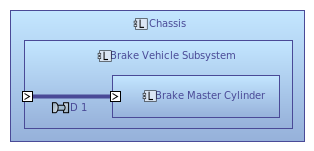

In [5]:
for object in  selected_objects : 
    #print(object)
    if object["type"] == "Diagram" :
        diagram = model.by_uuid(object["uuid"])
        #display(diagram)
    else:
        obj = model.by_uuid(object["uuid"])
        capellambse_helper.display_context_diagram(obj)

## 💬 Predefined Prompts for Analysis

### Purpose
This cell contains predefined prompts for analyzing different types of ARCADIA elements, including components, functions, operational processes, and a default prompt. You can use these as-is or tailor them to suit your specific needs.


### Instructions
1. The appropriate prompt will be used for your analysis needs.
2. Modify the prompt to include additional details or requirements, if necessary.

### Notes
- Predefined prompts are designed to guide analysis and ensure consistency.
- Tailoring the prompts allows you to focus on specific aspects of the model relevant to your use case.

> 💡 **Tip:** Save your tailored prompts for reuse in similar analyses or workflows.


In [6]:
component_prompt = """
Please analyze the yaml file and display the result as .html and specifically provide insights on:
1. The purpose of the component.
2. Any components that make it up.
3. A list of allocated functions and their potential roles.
4. How the ports relate to the functions.
5. Any traceabilty artifacts linked to the component and the artifacts url.
6. Suggestions for improving the component description.
7. Create a tabular table with columns for the component and its ports and the port interfaces, the interface souce and the interface target.
8. List any property values and the related model element.
9. A summary of any related state machines.
"""
function_prompt = """
Please analyze the yaml file and display the result as .html specifically provide insights on:
1. The purpose of the function.
2. Its owning component.
4. Any ports relate to the functions.
5. Any traceabilty artifacts linked to the component and the artifacts url.
6. Suggestions for improving the function description.
7. Create a tabular table with columns for the owning component, this function, its ports and the functional exchanges.
"""
activity_prompt = """
Please analyze the yaml file and display the result as .html specifically provide insights on:
1. The purpose of the activity.
2. Its actor or entiry.
4. Any traceabilty artifacts linked to the component and the artifacts url.
7. Suggestions for improving the activity description.
7. Create a tabular table with columns for the owning entity or actor, this activity, its exchanges.
"""
functional_chain_prompt = """
Please analyze the YAML file and display the result as .html specifically provide insights on:
1. The purpose of the functional chain.
2. A table with first column being the owning component, the second being a function, last column being involved functional exchange, organized by involved functional exchanges.
3. Any traceabilty artifacts linked to functional chain, functions, owning component and the traceability artifacts url.
4. List any property values and the related model element.
Please format the analysis in .html suitable for Juypter Notbook display operation.
"""
operational_process_prompt = """
Please analyze the YAML file and display the result as .html specifically provide insights on:
1. The purpose of the operation process.
2. A table with first column being the owning component, the second being a activities, last column being involved activity exchange, organized by involved activity exchanges.
3. Any traceabilty artifacts linked to the operational process chain, activities, owning component and the traceability artifacts url.
4. List any property values and the related model element.
Please format the analysis in .html suitable for Juypter Notbook display operation.
"""
diagram_prompt = """
Please analyze the YAML file and display the result as .html specifically provide insights on:
1. The purpose of the diagram based on its related nodes.
2. Describe what the nodes represent in the ARCADIA method and what the diagram is describing.
Please format the analysis in .html suitable for Juypter Notbook display operation.
"""
default_prompt = """
Please analyze the YAML file and display the result as .html specifically provide insights on:
1. The purpose of the primary component listed first in the yaml file.=.
2. List any property values and the related model element.
Please format the analysis in .html suitable for Juypter Notbook display operation.
"""



## ⚙️ Execute Default Prompts

### Purpose
This cell executes the **default prompts** defined for analyzing the model. These prompts are designed to provide general insights and overviews when specific object types or contexts are not explicitly defined.

### What This Cell Does
- Reads the structured input file (e.g., `capella_model.yaml`).
- Uses the default prompts to query key details about the selected object(s).
- Outputs the results directly in the notebook.

### 🛠️ Instructions
1. Ensure the `capella_model.yaml` file is generated and up-to-date.
2. Run this cell to execute the default prompts.
3. Review the output to verify the accuracy and relevance of the analysis.

### 📝 Notes
- The default prompts are **general-purpose** and may not capture all details specific to certain object types.
- For more tailored analysis, consider using prompts designed for specific ARCADIA elements.

> 💡 **Tip:** Use the default prompts as a starting point, then refine or modify them based on your analysis needs.


In [7]:
import os
from openai import OpenAI
from IPython.core.display import HTML
from IPython.display import display, clear_output, Markdown
#import Open_AI_RAG_manager

from capella_tools import Open_AI_RAG_manager
#print(object)
if object["type"] ==  "LogicalComponent" or object["type"] ==  "SystemComponent" or object["type"] ==  "PhysicalComponent-BEHAVIOR"  or object["type"] ==  "PhysicalComponent-NODE" :
    prompt = component_prompt
elif object["type"] ==  "FunctionalChain" :  
    prompt = functional_chain_prompt
elif object["type"] ==  "OperationalProcess":  
    prompt = functional_chain_prompt
elif object["type"] ==  "SystemFuntion" or object["type"] ==  "LogicalFunction" or object["type"] ==  "PhysicalFunction":
    prompt = function_prompt
elif object["type"] ==  "OperationalActivity" : 
    prompt = activity_prompt
elif object["type"] ==  "Diagram" : 
    prompt = diagram_prompt
else :
    prompt = default_prompt    


# Step 1: Get YAML content
yaml_content = yaml_handler.get_yaml_content()

# Step 2: Invoke ChatGPT for analysis
analyzer = Open_AI_RAG_manager.ChatGPTAnalyzer(yaml_content)
analyzer.initial_prompt(prompt)
chatgpt_response = analyzer.get_response()



OpenAI API Key retrieved successfully.


**Your prompt:** 
Please analyze the YAML file and display the result as .html specifically provide insights on:
1. The purpose of the primary component listed first in the yaml file.=.
2. List any property values and the related model element.
Please format the analysis in .html suitable for Juypter Notbook display operation.
 Format the response in .html format.

## ⚙️ Execute Followup Prompts

### Purpose
This cell executes the **follow up prompts** defined for analyzing the model. These prompts can be added by the note book user in addition to the default prompts

### What This Cell Does
- Use the structured input file (e.g., `capella_model.yaml`).
- Excutes the prompt defined in the cell.
- Outputs the results directly in the notebook.

### 🛠️ Instructions
1. Ensure the `capella_model.yaml` file is generated and up-to-date.
2. Run this cell to execute the default prompts.
3. Review the output to verify the accuracy and relevance of the analysis.

> 💡 **Tip:** Modify the promt to your needs.

In [8]:
analyzer.follow_up_prompt("List the functions of the component")
chatgpt_response = analyzer.get_response()

# Step 3: Display the response in the notebook
#print("ChatGPT Analysis:\n")
display(Markdown(f"\n\n**ChatGPT Analysis:**\n"))
#print(chatgpt_response)
display(HTML(chatgpt_response))

**Your prompt:** List the functions of the component

**ChatGPT Response:**

Based on the analysis of the YAML file, we can infer the following potential functions of the "ComponentExchange" between the "Brake Vehicle Subsystem" and the "Brake Master Cylinder":

1. **Facilitate Communication:**
   - The primary function of the "ComponentExchange" is to facilitate communication between the "Brake Vehicle Subsystem" and the "Brake Master Cylinder". This may involve the transmission of signals or the physical interaction of components responsible for braking.

2. **Coordinate Processes:**
   - It coordinates the necessary processes needed for the braking mechanism to function efficiently. This integration ensures that the braking commands from the vehicle are effectively relayed to the master cylinder.

3. **System Integration:**
   - The component exchange ensures seamless integration within the braking system, contributing to the overall system's performance and reliability.

4. **Data/Fluid Transfer:**
   - If applicable, it might imply the transfer of data or fluids (like hydraulic fluid in a brake system), necessary for the effective operation of the braking function.

5. **Maintain Safety and Functionality:**
   - Plays a role in maintaining the safety and functionality of the vehicle’s braking system by ensuring all interactions between components are well-regulated and responsive.

6. **Support Modularity:**
   - Supports a modular design approach allowing individual components to be developed and tested independently while maintaining the integrity of the system as a whole.

Please note that specific functions might vary depending on the full context and details of the system design, which are not fully captured in the provided YAML snippet.




**ChatGPT Analysis:**


## 💬 Launch Interactive Chat on Structured Input

### Purpose
This cell launches an interactive chat session based on the structured input file, leveraging ARCADIA and Polarion terminology to ensure the analysis remains consistent with the modeling context.

### Key Features
- Uses the generated structured input file (e.g., `capella_model.yaml`) to guide the conversation.
- Supports ARCADIA terms such as **functions**, **components**, **activities**, and **exchanges**.
- Incorporates Polarion terms like **workitem**, **requirement**, and **traceability** for seamless integration with requirements management workflows.

### How It Works
1. The structured input file provides context for the chat session.
2. You can interactively query details about the model elements, relationships, and dependencies.
3. Responses are tailored using ARCADIA and Polarion terminology.

### Example Prompts
- **For ARCADIA:**
  ```plaintext
  What are the dependencies and exchanges for the selected function in the Logical Architecture phase?

- **For Polarion:**
  ```plaintext
  Provide the traceability matrix for the workitem linked to this component.
  ```
### 🛠️ Instructions
1. Ensure the `capella_model.yaml` file has been generated and is up-to-date.
2. Run this cell to start the interactive chat session.
3. Enter your queries using **ARCADIA** or **Polarion** terms for accurate and relevant responses.

### 📝 Notes
- The interactive chat dynamically adapts to the content in the structured input file.
- Use precise and contextual queries to ensure the best results and insights.

> 💡 **Tip:** If you're unfamiliar with ARCADIA or Polarion terminology, consult the respective documentation or glossary for guidance.



In [9]:
analyzer.interactive_chat()


Starting interactive chat...


Output()

Textarea(value='', layout=Layout(border_bottom='2px solid #4A90E2', border_left='2px solid #4A90E2', border_ri…

Dropdown(description='Load file:', layout=Layout(width='auto'), options=('', 'embeddings.json', 'capella_model…

Waiting for chat interactions...


In [10]:
print("Done")

Done


# 